# Построение рисунков по данным 2013 год для статьи.

In [1]:
!date
!pwd

Ср дек 13 19:15:34 MSK 2017
/home/sphere/github/Sphere/Data2013


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#from tqdm import tqdm
#import math as mt
import numpy as np

In [41]:
from math import pi

In [3]:
!ls ./data

datum_2013.csv	      flight2.dbg.dat	    flight4.dbg.dat
flight1.dbg.2013.dat  flight3.dbg.2013.dat  flight5.dbg.2013.dat
flight1.dbg.dat       flight3.dbg.dat	    flight5.dbg.dat
flight2.dbg.2013.dat  flight4.dbg.2013.dat


In [4]:
datum = pd.read_csv('./data/datum_2013.csv')
len(datum)

2011

In [128]:
datum.head().T

,0,1,2,3,4
Unnamed: 0,0.0000,1.0000,2.0000,3.0000,4.0000
date,9.0000,9.0000,9.0000,9.0000,9.0000
time,131704.0000,131804.0000,131904.0000,132004.0000,132205.0000
N,5147.8302,5147.8302,5147.8284,5147.8291,5147.8292
E,10423.3018,10423.3074,10423.3092,10423.3096,10423.3009
H,762.9000,762.5000,763.1000,762.9000,761.4000
H-455,315.2000,314.8000,315.4000,315.2000,313.7000
compass,31.8000,28.4000,33.8000,38.7000,19.2000
P_hpa0,930.2000,930.1000,930.2000,930.1000,930.4000
"T0,C",18.3000,18.5000,18.7000,18.8000,19.2000


### Общие настройки графиков

In [89]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14

In [85]:
plt.rcParams.keys()

In [87]:
def plot_for_paper(name, file, yaxislabel):
    plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-']
    for i in range(5):
        x = datum.minuts[datum.run == (i+1)]
        y = datum[name][ datum.run == (i+1)]
        label = 'run ' + str(i+1)
        plt.plot(x, y, plcol[i],  alpha=0.9, label = label)
        
    plt.xlim(0, 600)    
    if name in ['H-455','ClinTh']:
        plt.ylim(0)
    plt.xlabel('Flight time, min')
    plt.ylabel(yaxislabel)
    plt.legend(loc=0)
    plt.grid()
    plt.savefig(file, bbox_inches='tight')    

### Рисование графиков для статьи

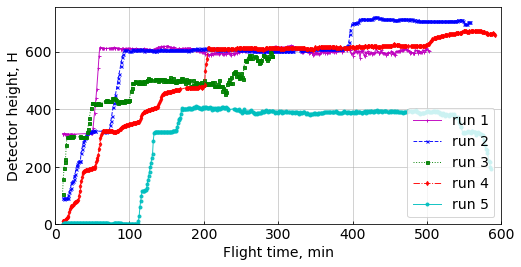

In [90]:
plot_for_paper('H-455', 'height.eps', 'Detector height, H')

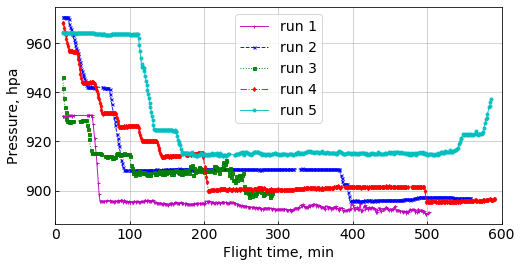

In [91]:
plot_for_paper('P_hpa0','P_hpa0.eps', 'Pressure, hpa')

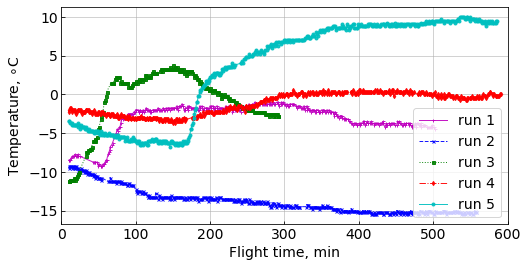

In [92]:
plot_for_paper('Tmos,C','Tmos.eps', 'Temperature, $\circ$C')

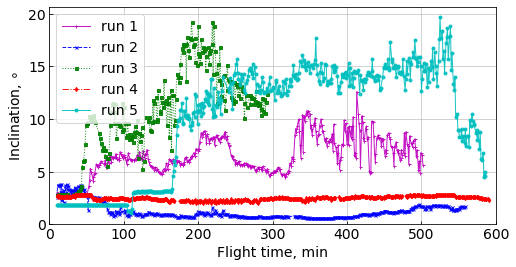

In [97]:
plot_for_paper('ClinTh','ClinTh.eps', 'Inclination, $\circ$')

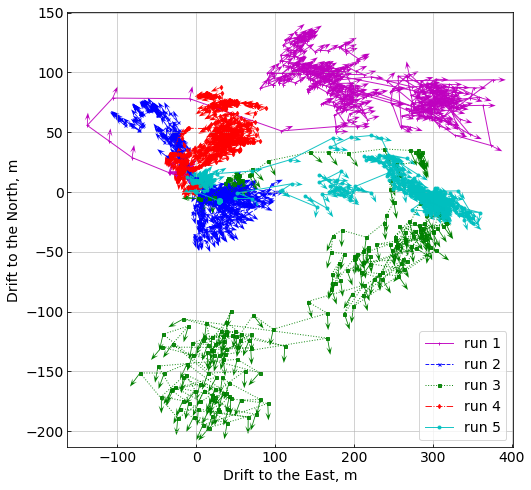

In [127]:
fig = plt.figure(figsize=(8,8))
ax2 = plt.subplot()

shift = 90 # + 180

plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-']
for i in range(5):
    U = 0.1 * np.cos((shift - datum.compass[datum.run == (i+1)]) * pi/180) 
    V = 0.1 * np.sin((shift - datum.compass[datum.run == (i+1)]) * pi/180)
    x = datum.dE[datum.run == (i+1)] 
    y = datum.dN[datum.run == (i+1)] 
    qui = ax2.quiver(x,  y, U, V,
                     color=plcol[i][0], units='x', width=1.0, 
                     headwidth = 7, headlength  = 10, headaxislength = 6)
    
    label = 'run ' + str(i+1)
    plt.plot(x, y, plcol[i],  alpha=0.9, label = label)
    #plt.scatter(x, y, color=plcol[i][0], s=1, label = None)

plt.xlabel('Drift to the East, m')
plt.ylabel('Drift to the North, m')
plt.legend(loc=0)
plt.grid()
plt.savefig('GPS+quiver.eps', bbox_inches='tight')
plt.savefig('GPS+quiver.png', bbox_inches='tight')

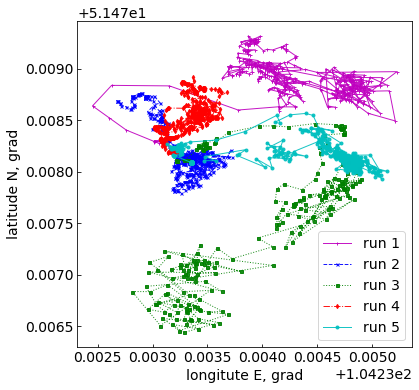

In [99]:
plt.figure(figsize=(6,6))

plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-']
for i in range(5):
    x = datum.E[datum.run == (i+1)] * 0.01
    y = datum.N[datum.run == (i+1)] * 0.01
    label = 'run ' + str(i+1)
    plt.plot(x, y, plcol[i],  alpha=0.9, label = label)

plt.xlabel('longitute E, grad')
plt.ylabel('latitude N, grad')
plt.legend(loc=0)
plt.savefig('GPS.eps', bbox_inches='tight')

## Compass

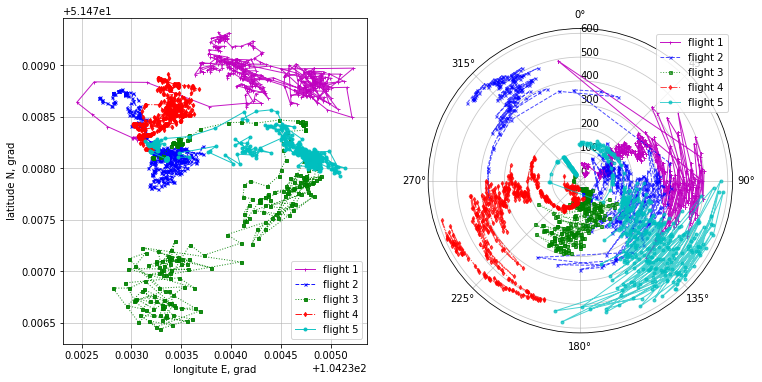

In [276]:
from math import pi
fig = plt.figure(figsize=(12,6)) # зададим явно размер полотна, чтобы графики не перекрывались

ax = fig.add_subplot(121)
x = 'E'
y = 'N'
plt.plot(datum1[x]*0.01, datum1[y]/100, 'm+-',  alpha=0.9, label = 'flight 1')
plt.plot(datum2[x]*0.01, datum2[y]/100, 'bx--', alpha=0.9, label = 'flight 2')
plt.plot(datum3[x]/100, datum3[y]/100, 'gs:',  alpha=0.9, label = 'flight 3')
plt.plot(datum4[x]/100, datum4[y]/100, 'rd-.', alpha=0.9, label = 'flight 4')
plt.plot(datum5[x]/100, datum5[y]/100, 'co-',  alpha=0.9, label = 'flight 5')
plt.xlabel('longitute E, grad')
plt.ylabel('latitude N, grad')
plt.legend(loc=0)
plt.grid()

ax = fig.add_subplot(122, projection='polar')
x='compass'
plt.plot(datum1[x] / 10 * pi/180, datum1['minuts'], 'm+-',  alpha=0.9, label = 'flight 1')
plt.plot(datum2[x] / 10 * pi/180, datum2['minuts'], 'bx--', alpha=0.7, label = 'flight 2')
plt.plot(datum3[x] / 10 * pi/180, datum3['minuts'], 'gs:',  alpha=0.7, label = 'flight 3')
plt.plot(datum4[x] / 10 * pi/180, datum4['minuts'], 'rd-.', alpha=0.7, label = 'flight 4')
plt.plot(datum5[x] / 10 * pi/180, datum5['minuts'], 'co-',  alpha=0.7, label = 'flight 5')
plt.legend(loc=0)

# Изменяем направление обхода с "против часовой" на "по часовой"
ax.set_theta_direction(-1)
# Смещаем нулевую или полярную ось на 90 градусов против часовой стрелки, в положение "север"
ax.set_theta_offset(pi/2.0)
#ax.set_title(u"Роза ветров", loc='center');
# Перемещаем ось радиусов
ax.set_rlabel_position(0)

plt.savefig('GPS_and_compass.eps')

## Высота

In [176]:
def plot_param(x, file):
    plt.figure(figsize=(8,4))
    plt.plot(datum1.minuts, datum1[x], 'm+', alpha=0.4, label = 'flight 1')
    plt.plot(datum2.minuts, datum2[x], 'bx', alpha=0.4, label = 'flight 2')
    plt.plot(datum3.minuts, datum3[x], 'gs', alpha=0.4, label = 'flight 3')
    plt.plot(datum4.minuts, datum4[x], 'rd', alpha=0.4, label = 'flight 4')
    plt.plot(datum5.minuts, datum5[x], 'co', alpha=0.4, label = 'flight 5')
    plt.xlabel('Flight time, min')
    plt.legend(loc=0)
    plt.title(x)
    plt.grid()
    if file != None:
        plt.savefig(file)

## Высота и барометры

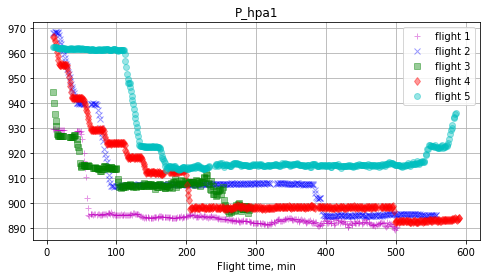

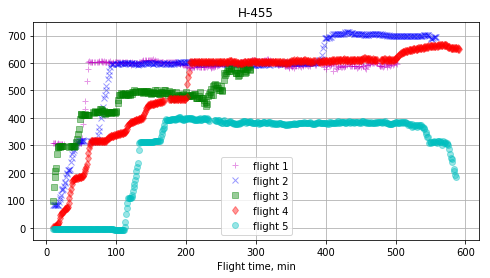

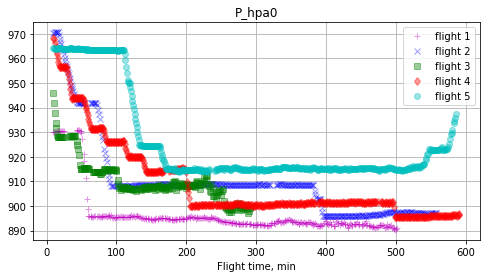

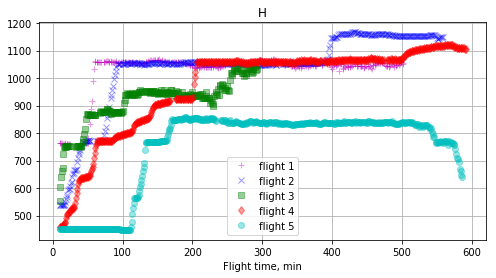

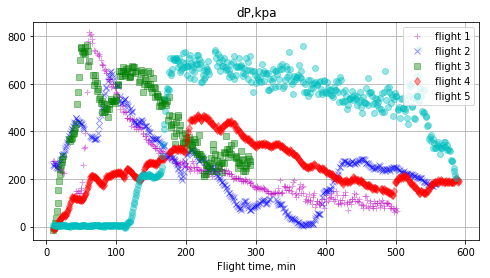

In [138]:
params = {'H','H-455','P_hpa0','P_hpa1','dP,kpa'}
for x in params:
    plot_param(x, None)

## Температура

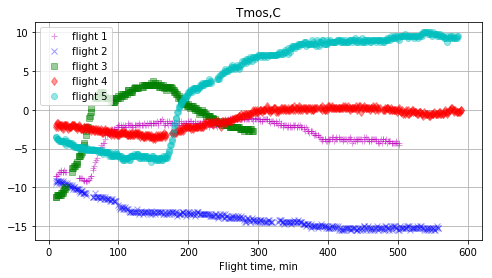

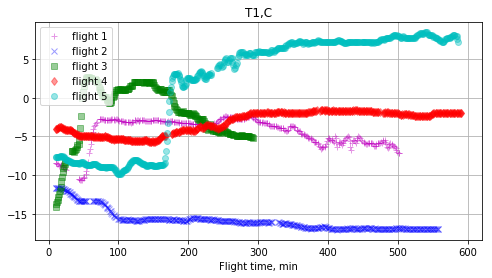

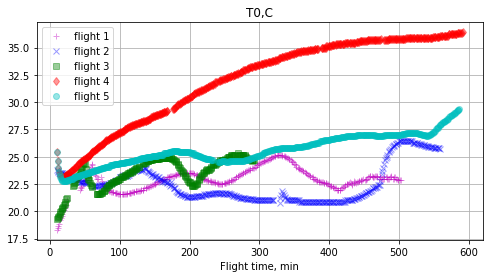

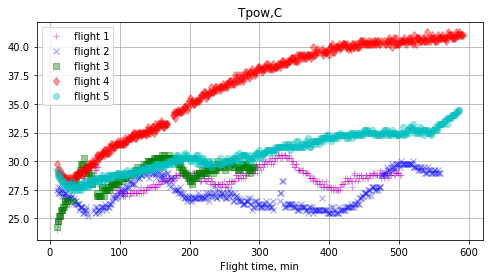

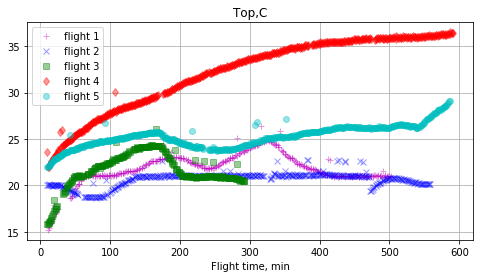

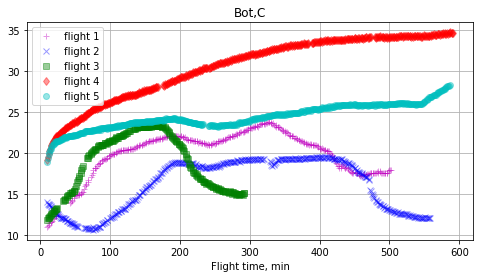

In [139]:
params = {'T0,C','T1,C','Tpow,C','Tmos,C','Bot,C','Top,C'}
for x in params:
    plot_param(x, None)

## Напряжения и ток

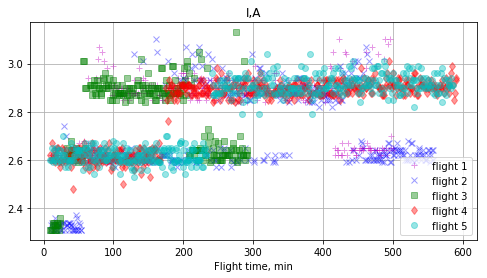

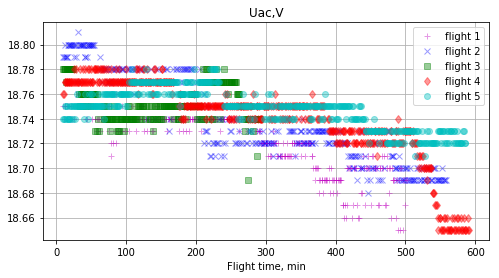

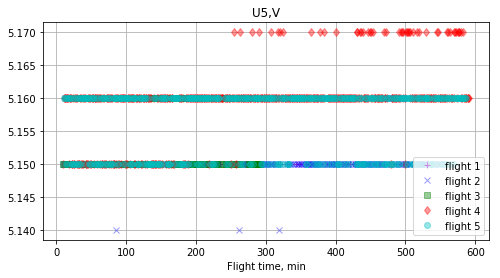

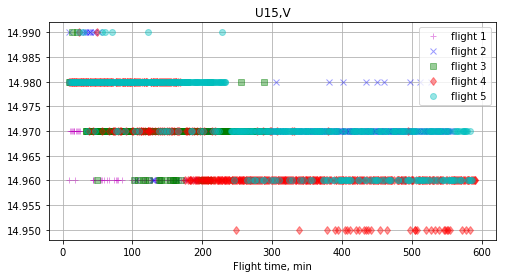

In [133]:
params = {'U15,V','U5,V','Uac,V','I,A'}
for x in params:
    plot_param(x, None)

## Координаты и компас

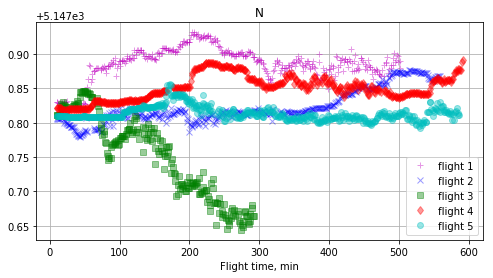

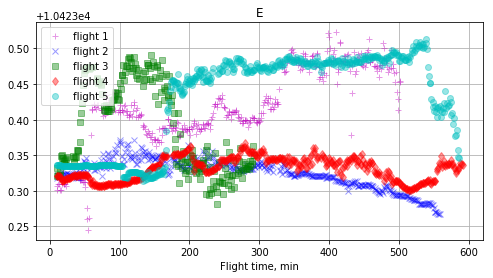

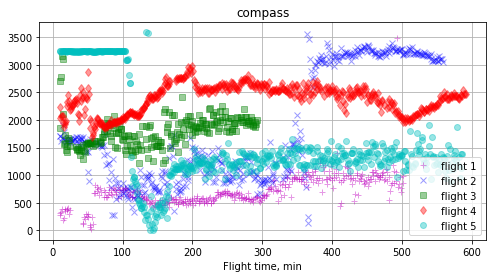

In [134]:
params = {'N','E','compass'}
for x in params:
    plot_param(x, None)

## Наклон установки

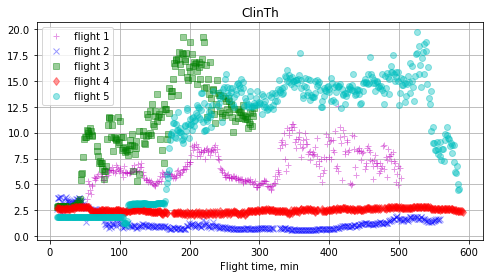

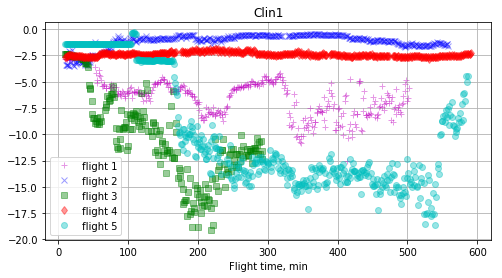

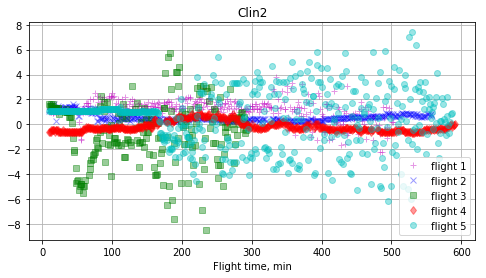

In [129]:
params = {'Clin1','Clin2','ClinTh'}
for x in params:
    plot_param(x, None)